In [327]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
%matplotlib inline
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


прочитаем данные

In [328]:
cancer = pd.read_csv("./breast-cancer-wisconsin.data", names = ["code", "clumpThickness", "uniformityCellSize",
                                                               "uniformityCellShape", "marginalAdhesion", "epithelialCellSize",
                                                               "bareNuclei", "blandChromatin", "normalNucleoli", "mitoses", "class"])
cancer = cancer.sample(frac=1)

In [329]:
cancer.head()

,code,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,epithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
161,1197080,4,1,1,1,2,1,3,2,1,2
11,1036172,2,1,1,1,2,1,2,1,1,2
492,1133991,4,1,1,1,1,1,2,1,1,2
517,1320077,1,1,1,1,1,1,2,1,1,2
276,434518,3,1,1,1,2,1,2,1,1,2


In [330]:
#Заменим нечисловые значения на NaN
cancer = cancer.apply(pd.to_numeric, args=('coerce',))

#сделаем искомый признак категориальным (categorical)
cancer['class'] = cancer['class'].astype("category")

#сделаем тип float для всех остальных признаков
for i in range(1,9):
    cancer.ix[:,i].fillna(method='pad')
    cancer.ix[:,i] = cancer.ix[:,i].astype("float")
#избавимся от NaN
cancer = cancer.dropna()

In [331]:
#добавим колонку цвета. Она нам пригодится в дальнейшем.
cancer['color'] = np.where(cancer['class'] == 2, 'white', 'red') 

In [332]:
X_train, X_test, y_train, y_test = train_test_split(cancer.ix[:, (cancer.columns != 'class') & (cancer.columns != 'code') & (cancer.columns != 'color')], 
                                                    cancer['class'], 
                                                    test_size=0.25)

Будем оценивать распределение каждого из признаков

In [333]:
def makeMultipleHists(var = "clumpThickness", num = 1):
    plt.figure(1)
    plt.figure(figsize = (10,8))
    for i in range(1, num + 1):
        subplot_number = int("22%i"%i)
        plt.subplot(subplot_number)
        stat = cancer[cancer[var] == i].groupby('class')['class'].count()
        stat.plot(kind='bar', color='r', width=0.7)
        plt.tight_layout()

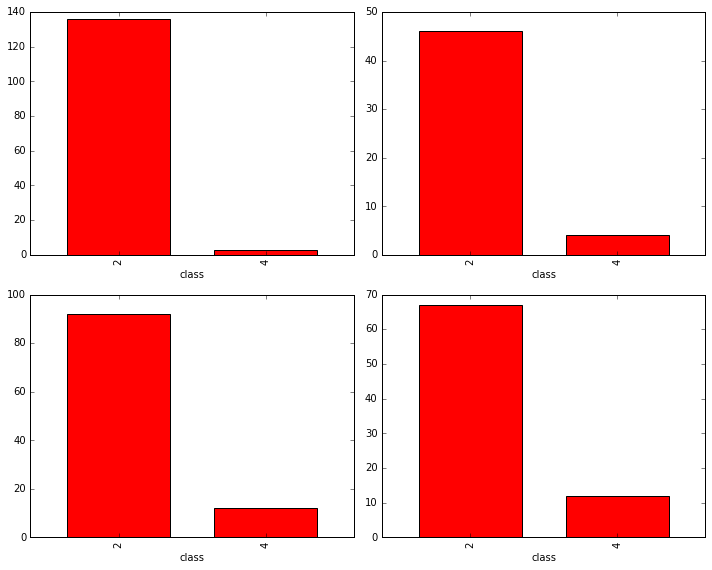

In [334]:
makeHist(num = 4)

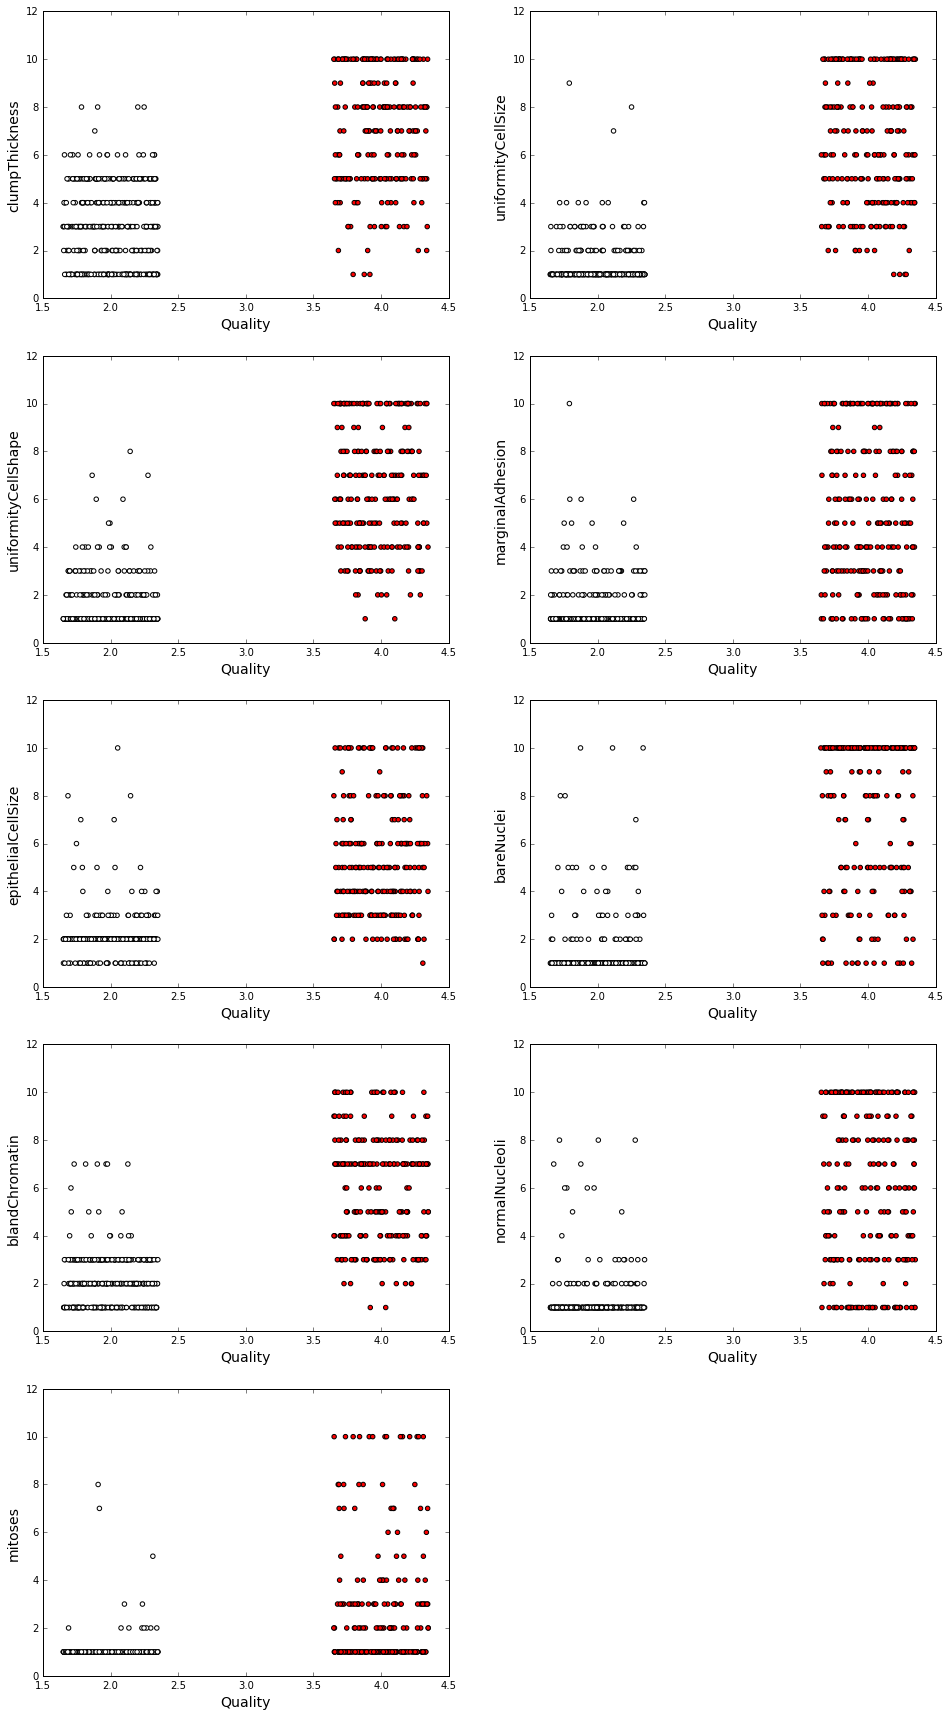

In [335]:
def jitter(arr):
    return arr + np.random.uniform(low=-0.35, high=0.35, size=len(arr))

pyplot.figure(figsize(16, 36))
for i in range (1, 10):
    pyplot.subplot(6, 2, i)
    pyplot.scatter(jitter(cancer['class']), cancer.ix[:, i], color = cancer['color'], edgecolors="black")
    pyplot.xlabel('Quality', fontsize=14)
    pyplot.ylabel(str(cancer.columns[i]), fontsize=14)

## Линейная регрессия

In [336]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ошибки прогнозирования

In [337]:
np.sqrt(mean_squared_error(lm.predict(X_train), y_train))

0.38358692190515581

In [338]:
np.sqrt(mean_squared_error(lm.predict(X_test), y_test))

0.36600099039913025

Классы и их предсказания линейной моделью

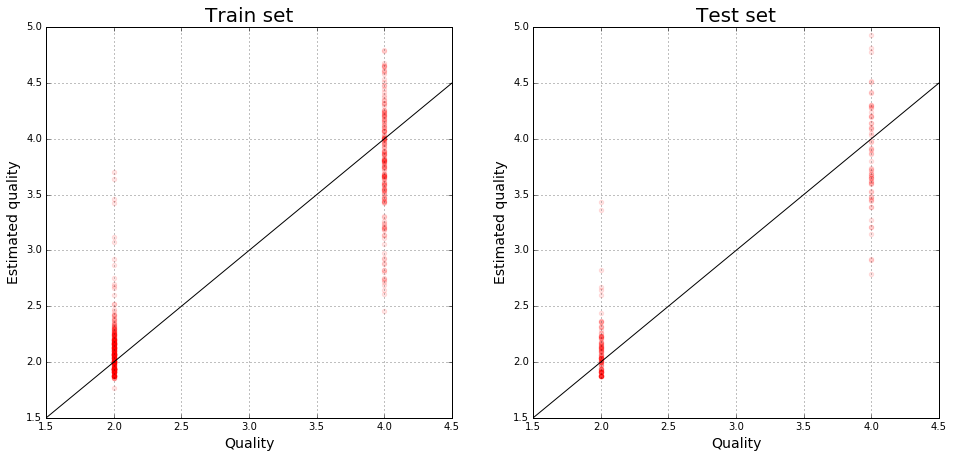

In [339]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

Посчитаем коэффициент детерминации — долю объяснённой моделью дисперсии отклика:

In [340]:
lm.score(X_test, y_test)

0.85607625679968735

## Случайный лес

In [341]:
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=4)

In [342]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [343]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.24421526572192492

In [344]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.32233423181950593

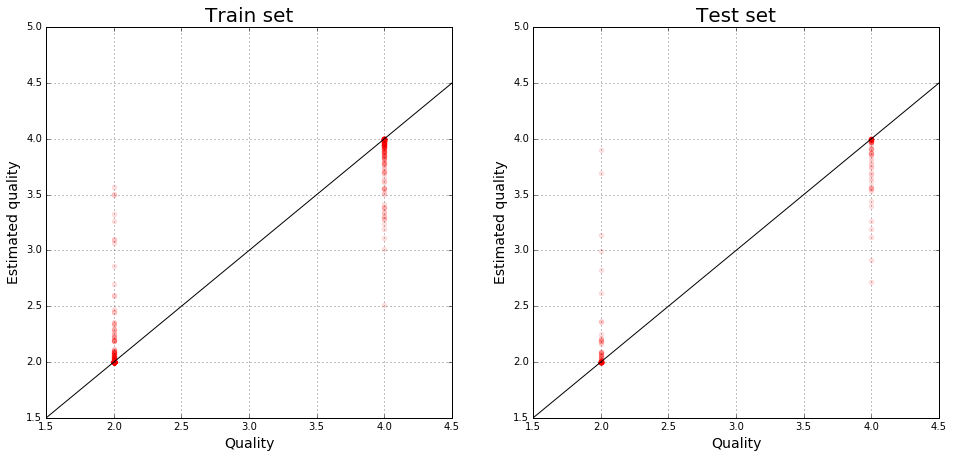

In [345]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [346]:
rf.score(X_test, y_test)

0.88837003607748743

In [347]:
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

8.2795706890043309e-05

In [348]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.061332216880808858, 0.18092717819142201)

In [349]:
importances = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
1,uniformityCellSize,0.547688
2,uniformityCellShape,0.283270
5,bareNuclei,0.076681
0,clumpThickness,0.024422
6,blandChromatin,0.023126
7,normalNucleoli,0.019346
4,epithelialCellSize,0.014657
3,marginalAdhesion,0.010189
8,mitoses,0.000621


Самый значимый признак - uniformityCellSize.